In [1]:
# import libraries
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# load dataframe in a variable name it 'df_ventas'
df_ventas = pd.read_csv("C:/Users/Alejandro Verdugo/Downloads/2023_ventas.csv", dtype={"SUCURSAL": str})

In [3]:
# group sales by store and subcategory
df_ventas = df_ventas.groupby(['SUCURSAL', 'SubC'])['COSTO'].sum().reset_index()
df_ventas

,SUCURSAL,SubC,COSTO
0,CULIACAN,ACCESORIOS CICLO REF,1684718.77
1,CULIACAN,ACCESORIOS ELECTRICOS,1210965.24
2,CULIACAN,ASTROCOOL,40864.00
3,CULIACAN,COMPRESORES,5768891.51
4,CULIACAN,CONTROLES,1048015.72
...,...,...,...
180,TIJUANA,QUIMICOS Y SOLVENTES,2516631.35
181,TIJUANA,REFACC FUERA CATALOGO,27885.97
182,TIJUANA,REFACC ORIGINALES,1730447.25
183,TIJUANA,"TUBERIA, AISLAMIENTO Y CONEXIONES",12821063.27


In [4]:
# dictionary with the coordinates of cities
coordenadas_ciudades = {
    "HERMOSILLO": (29.1026, -110.97732),
    "NOGALES": (31.30862, -110.94217),
    "CULIACAN": (24.79032, -107.38782),
    "TIJUANA": (32.5027, -117.00371),
    "OBREGON": (27.48642, -109.94083),
    "MEXICALI": (32.62781, -115.45446),
    "LA PAZ": (24.14437, -110.3005),
    "LOS MOCHIS": (25.79302, -108.99808),
    "GUADALAJARA": (20.66682, -103.39182),
    "QUERETARO": (20.58806, -100.38806),
    "MONTERREY": (25.67507, -100.31847)
}

# df_sales dataframe
for index, row in df_ventas.iterrows():
    ciudad = row['SUCURSAL']
    if ciudad in coordenadas_ciudades:
        df_ventas.at[index, 'latitud'], df_ventas.at[index, 'longitud'] = coordenadas_ciudades[ciudad]

df_ventas

,SUCURSAL,SubC,COSTO,latitud,longitud
0,CULIACAN,ACCESORIOS CICLO REF,1684718.77,24.79032,-107.38782
1,CULIACAN,ACCESORIOS ELECTRICOS,1210965.24,24.79032,-107.38782
2,CULIACAN,ASTROCOOL,40864.00,24.79032,-107.38782
3,CULIACAN,COMPRESORES,5768891.51,24.79032,-107.38782
4,CULIACAN,CONTROLES,1048015.72,24.79032,-107.38782
...,...,...,...,...,...
180,TIJUANA,QUIMICOS Y SOLVENTES,2516631.35,32.50270,-117.00371
181,TIJUANA,REFACC FUERA CATALOGO,27885.97,32.50270,-117.00371
182,TIJUANA,REFACC ORIGINALES,1730447.25,32.50270,-117.00371
183,TIJUANA,"TUBERIA, AISLAMIENTO Y CONEXIONES",12821063.27,32.50270,-117.00371


In [5]:
# group the data by city and category, adding the amounts
df_agrupado = df_ventas.groupby(['SUCURSAL', 'SubC', 'latitud', 'longitud'])['COSTO'].sum().reset_index()

# get a list of unique categories and sort them alphabetically
categorias = sorted(df_agrupado['SubC'].unique())
categoria_inicial = categorias[0]  # first category

# create a figure with a graph for each category
fig = go.Figure()

for categoria in categorias:
    df_filtrado = df_agrupado[df_agrupado['SubC'] == categoria]
    visible = (categoria == categoria_inicial)  # Solo la primera categoría es visible al inicio
    fig.add_trace(
        go.Scattergeo(
            lat=df_filtrado['latitud'],
            lon=df_filtrado['longitud'],
            text=df_filtrado['SUCURSAL'] + ' - ' + df_filtrado['COSTO'].astype(str),
            marker=dict(
                size=df_filtrado['COSTO'],
                sizemode='area',
                sizeref=2.*max(df_filtrado['COSTO'])/(40.**2),
                sizemin=4,
                color=df_filtrado['COSTO'],
                colorscale='YlOrRd',
                colorbar_title='Cantidad Vendida',
            ),
            visible=visible,
            name=categoria
        )
    )

# set the initial title to reflect the first category
fig.update_layout(
    title=f'Ventas en dinero de la categoría: {categoria_inicial} en sucursales',
    width=1800,
    height=800,
    showlegend=False,
    geo=dict(
        scope='north america',
        projection_type='natural earth'
    ),
    updatemenus=[{
        "buttons": [
            dict(
                label=categoria,
                method="update",
                args=[{"visible": [categoria == cat for cat in categorias]},
                      {"title": f"Ventas en dinero de la categoría: {categoria} en sucursales"}]
            ) for categoria in categorias
        ],
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "right",
        "y": 1.0,
        "yanchor": "top"
    }]
)

# show the map
fig


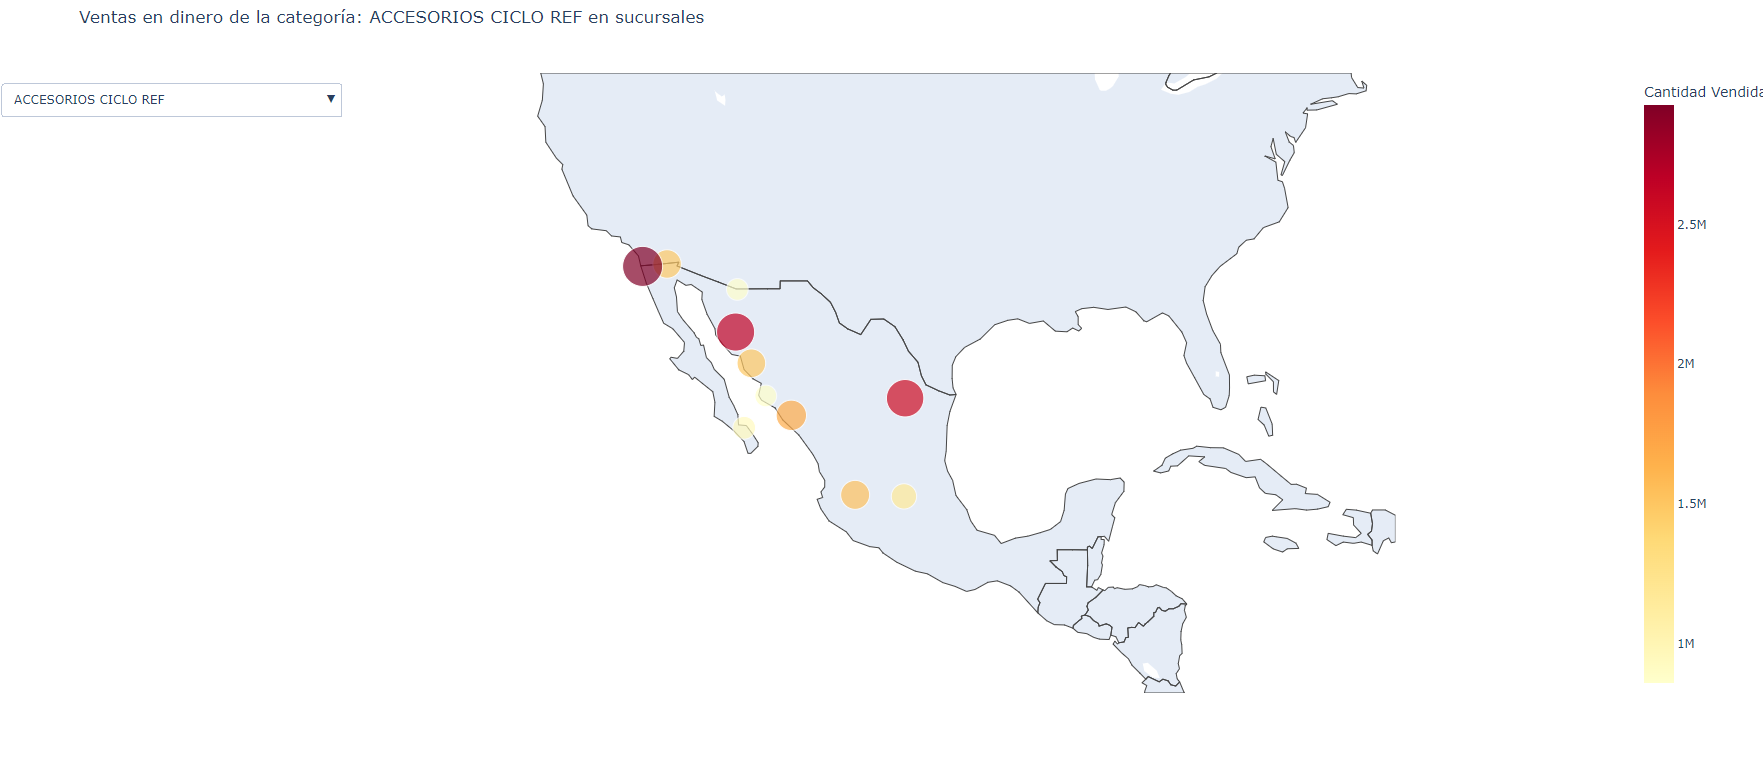